<a href="https://colab.research.google.com/github/aparna-2001/medical-insurance-charges-ML-model-2021-2025/blob/main/Final_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Model Comparison & Conclusions

* Comparing all models built across OLS, RF, GBM.
* Target: Predict medical insurance charges
* Sub target : predicting wether an individual is smoker or non smoker based on charge
* Best model selection with justification and business recommendations.


#INDEX
    

     * EDA ANALYSIS INSGHTS
     * OLS RESULTS
     * RANDOM FOREST RESULTS
         * CONFUSION MATRIX COMPARISON
         * ROC CURVE COMPARISON
     * GRADIENT BOOSTING MODEL RESULTS
         * GBM CURVE
         * RESIDUAL PLOT
         * IMPORTANT FEATURES
     * PARAMETER COMPARISON TABLE
     * R-SQUARE COMPARISON BAR CHART
     * R-SQUARE GAP COMPARISON TABLE
     * MAE AND RMSE COMPARSION
     * IMPORTANT FEATURES
     * BUSSINESS INSIGHTS
     * PROJECT CONCLUSION


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', font_scale=1.1)
plt.rcParams['figure.dpi'] = 110

**EDA Analysis Insights**



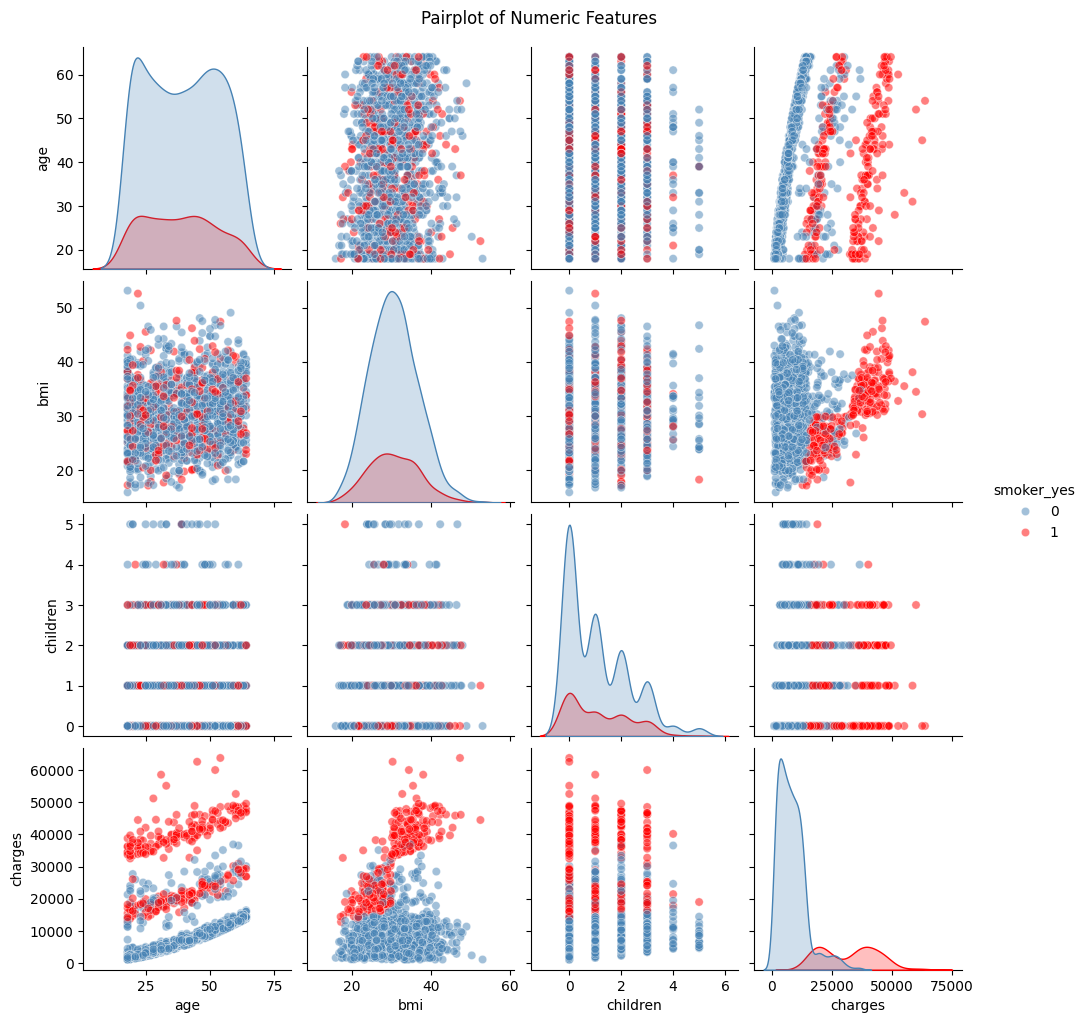

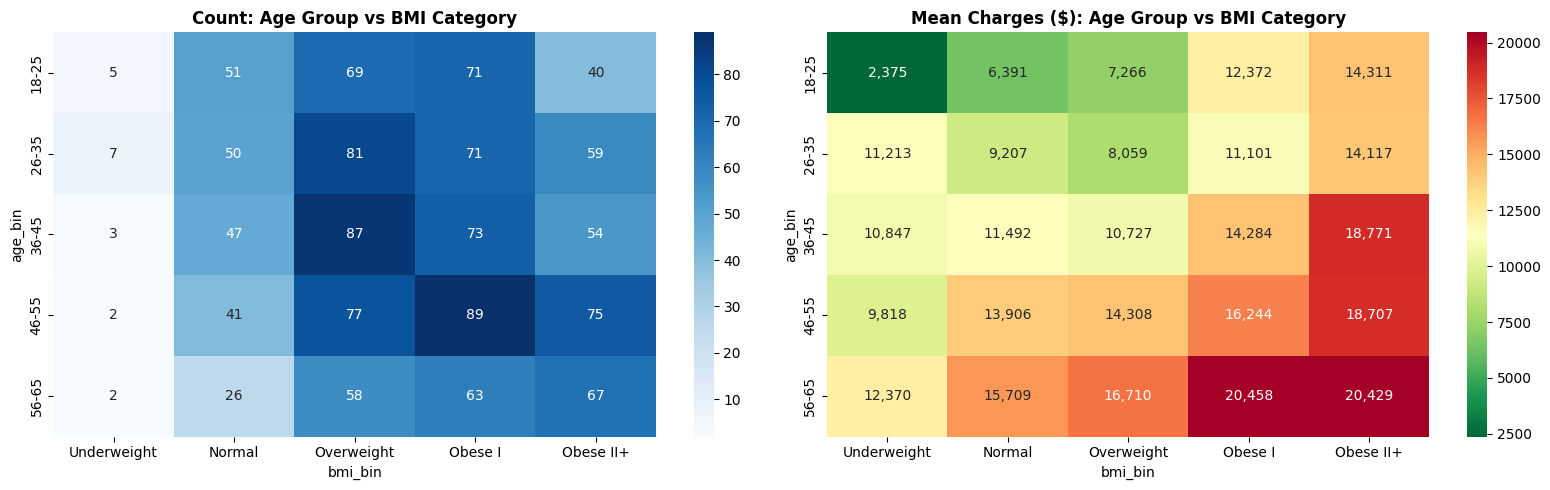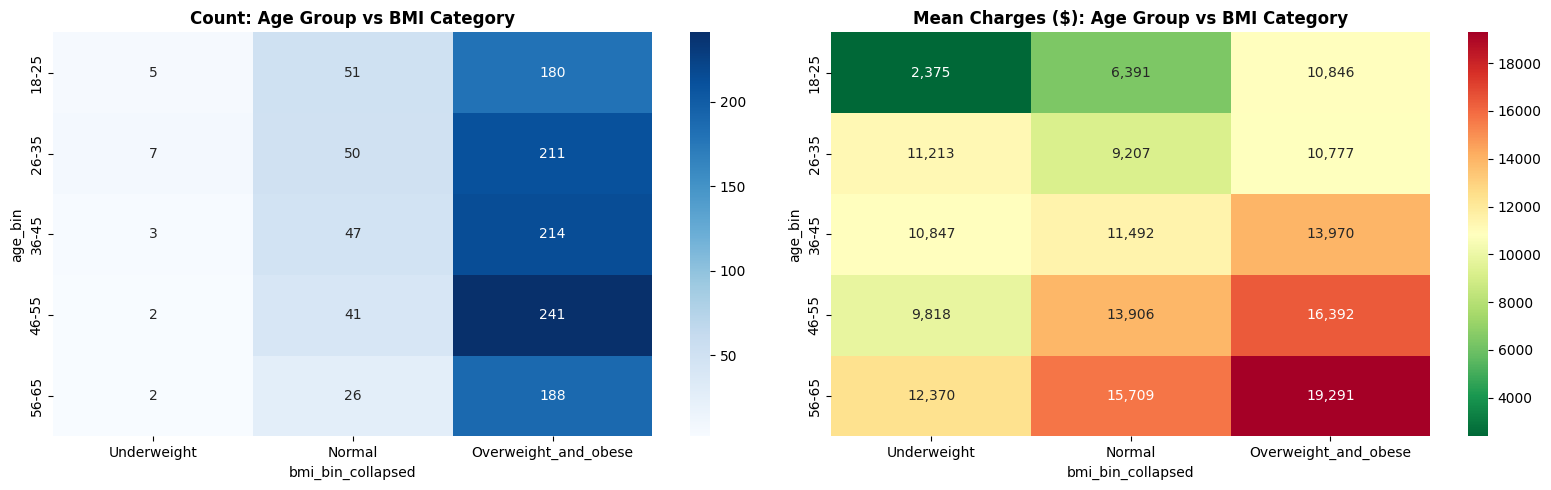

**OLS RESULTS**

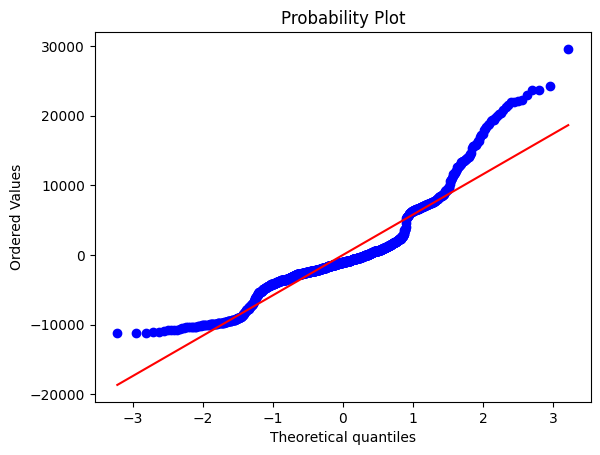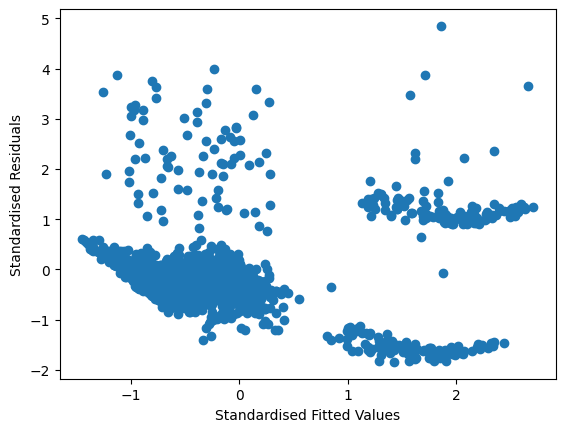

**RANDOM FOREST RESULTS**

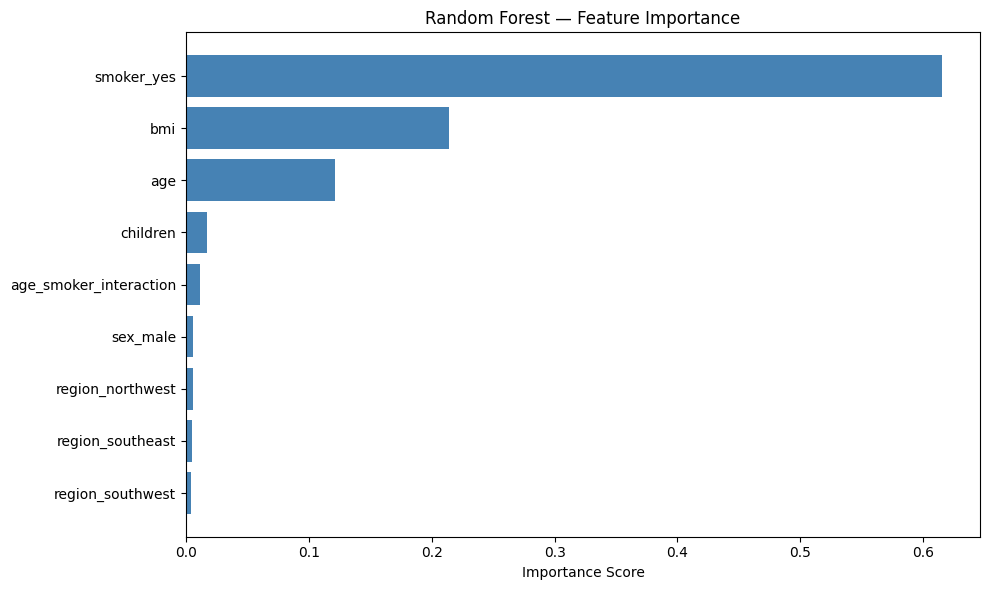

*confusion matrix comparison (RF with and without charge)*

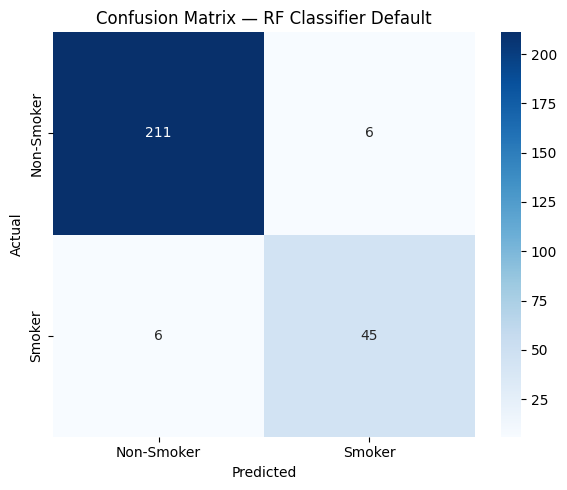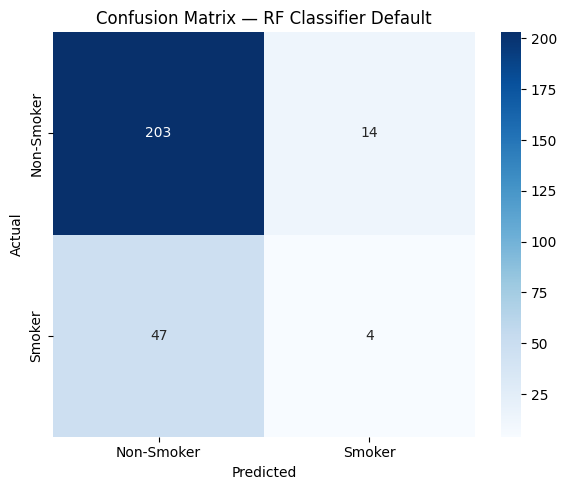

*ROC curve comparison (RF with and without charge)*

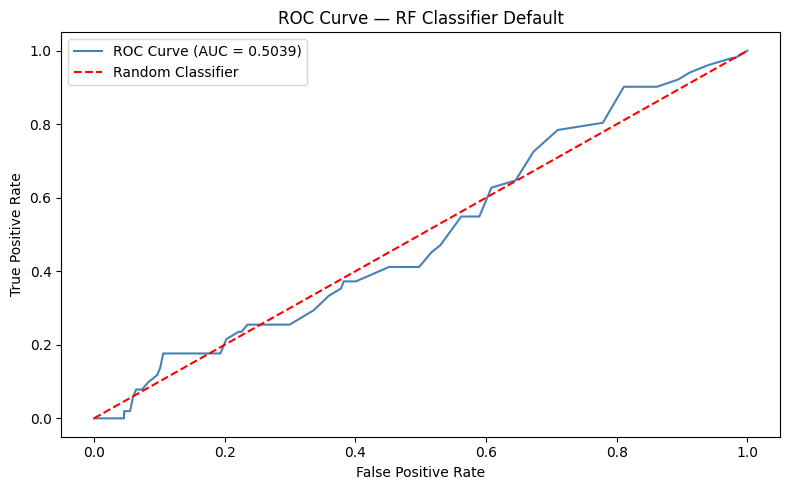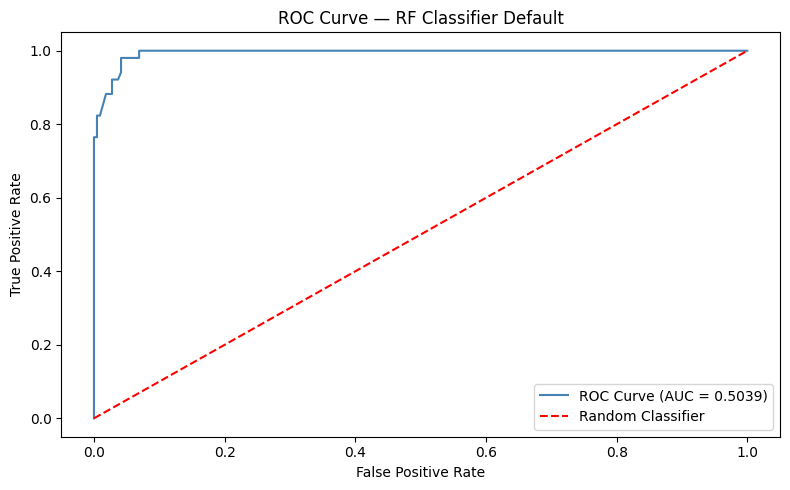

**GRADIENT BOOSTING MODEL RESULTS**

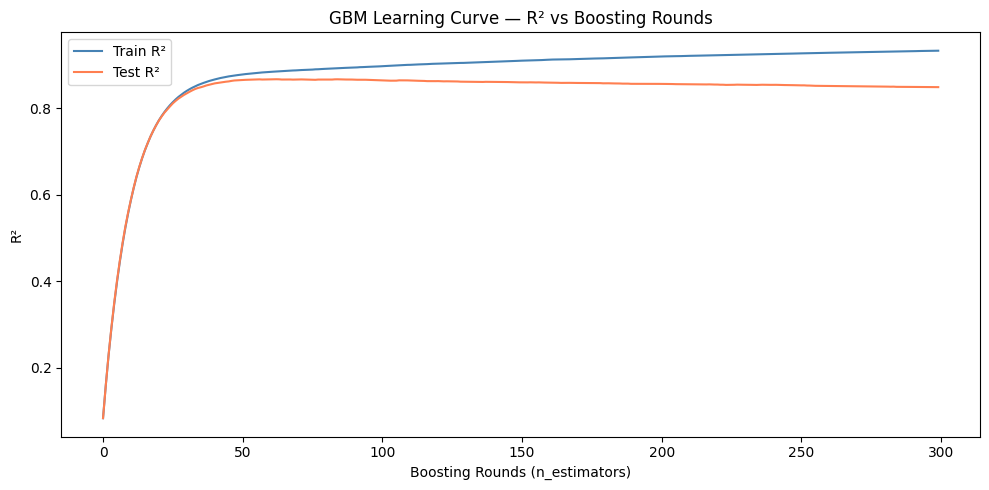

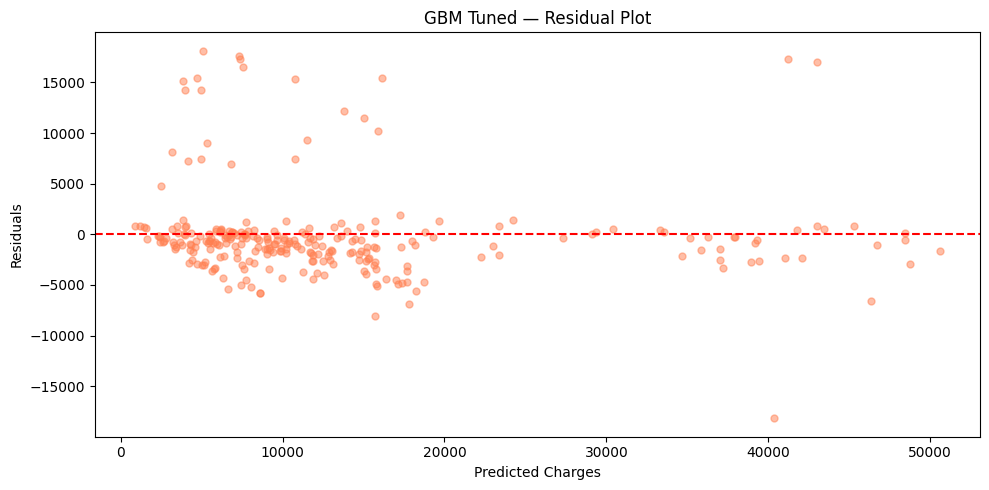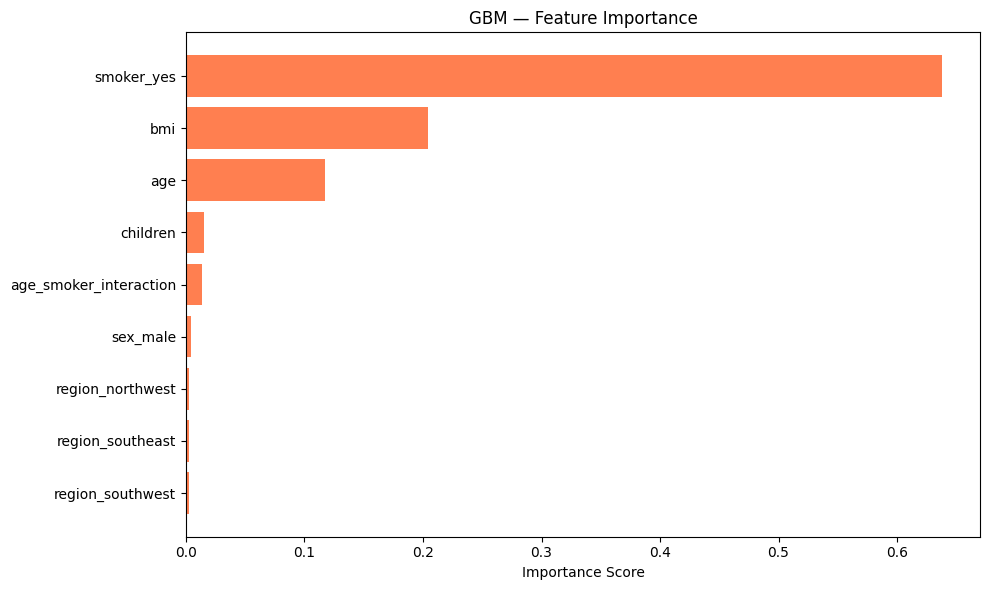

**PARAMETER COMPARISON TABLE**

In [10]:
final_comparison = pd.DataFrame({
    'Model': [
        'OLS Full',
        'OLS Reduced',
        'OLS Cooks Cleaned',
        'OLS VIF Fixed',
        'RF Default',
        'RF Tuned',
        'GBM Run 1 (Default)',
        'GBM Run 2 (Tuned)',
        'GBM Run 3 (n_est=50)'
    ],
    'Test R²': [
        0.751, 0.749, 0.747, 0.751,
        0.8409, 0.8647,
        0.8684, 0.8487, 0.8649
    ],
    'Test MAE': [
        None, None, None, None,
        2733.99, 2464.00,
        2358.45, 2582.20, 2608.67
    ],
    'Test RMSE': [
        None, None, None, None,
        4643.65, 4282.69,
        4224.32, 4529.30, 4279.41
    ],
    'R² Gap': [
        None, None, None, None,
        0.1347, 0.0453,
        0.0329, 0.0842, 0.0123
    ]
})

final_comparison.set_index('Model', inplace=True)
final_comparison

,Test R²,Test MAE,Test RMSE,R² Gap
Model,,,,
OLS Full,0.7510,NaN,NaN,NaN
OLS Reduced,0.7490,NaN,NaN,NaN
OLS Cooks Cleaned,0.7470,NaN,NaN,NaN
OLS VIF Fixed,0.7510,NaN,NaN,NaN
RF Default,0.8409,2733.99,4643.65,0.1347
RF Tuned,0.8647,2464.00,4282.69,0.0453
GBM Run 1 (Default),0.8684,2358.45,4224.32,0.0329
GBM Run 2 (Tuned),0.8487,2582.20,4529.30,0.0842
GBM Run 3 (n_est=50),0.8649,2608.67,4279.41,0.0123


**R-SQUARE COMPARSION BAR CHART**

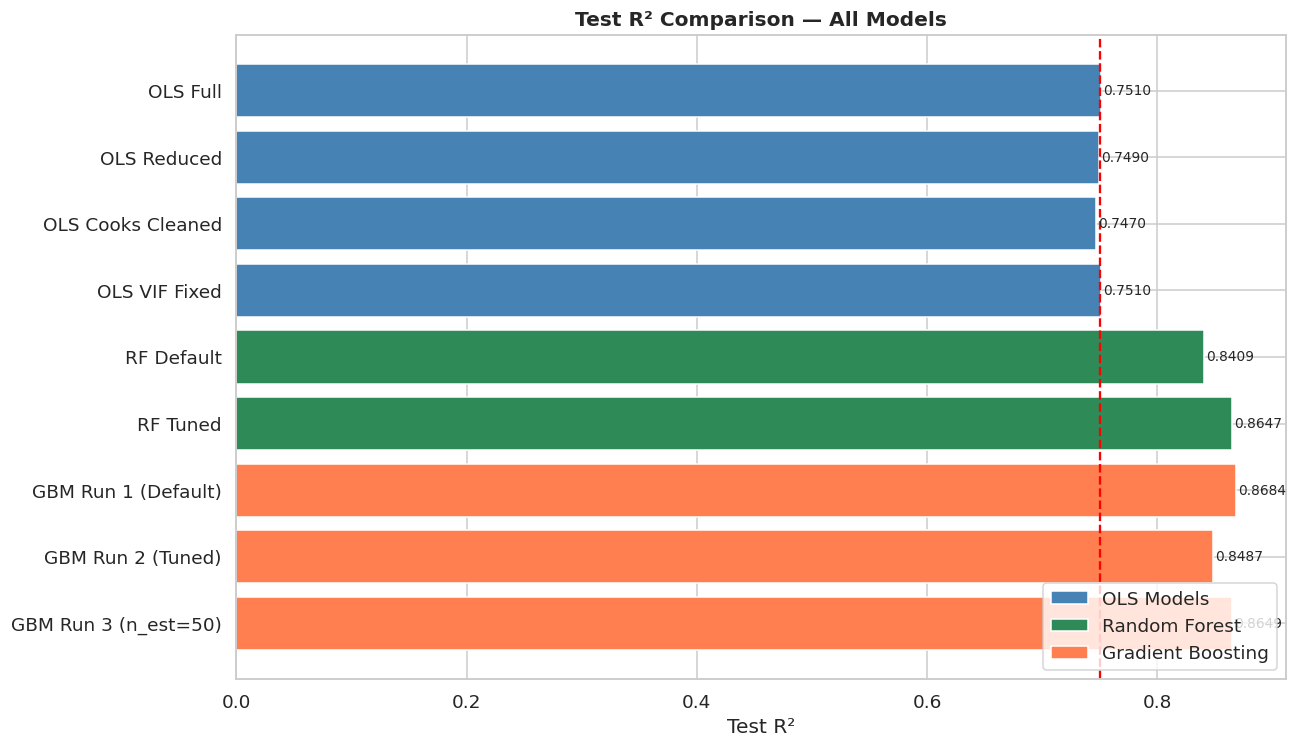

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))

colors = ['steelblue' if 'OLS' in m
          else 'seagreen' if 'RF' in m
          else 'coral'
          for m in final_comparison.index]

bars = ax.barh(final_comparison.index[::-1],
               final_comparison['Test R²'][::-1],
               color=colors[::-1], edgecolor='white')

ax.axvline(x=0.75, color='red', linestyle='--',
           linewidth=1.5, label='OLS Baseline (0.751)')
ax.set_xlabel('Test R²')
ax.set_title('Test R² Comparison — All Models', fontweight='bold')
ax.legend()

for bar, val in zip(bars, final_comparison['Test R²'][::-1]):
    ax.text(val + 0.002, bar.get_y() + bar.get_height()/2,
            f'{val:.4f}', va='center', fontsize=9)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', label='OLS Models'),
    Patch(facecolor='seagreen',  label='Random Forest'),
    Patch(facecolor='coral',     label='Gradient Boosting')
]
ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.show()

**R-SQUARE GAP COMPARISON TABLE**

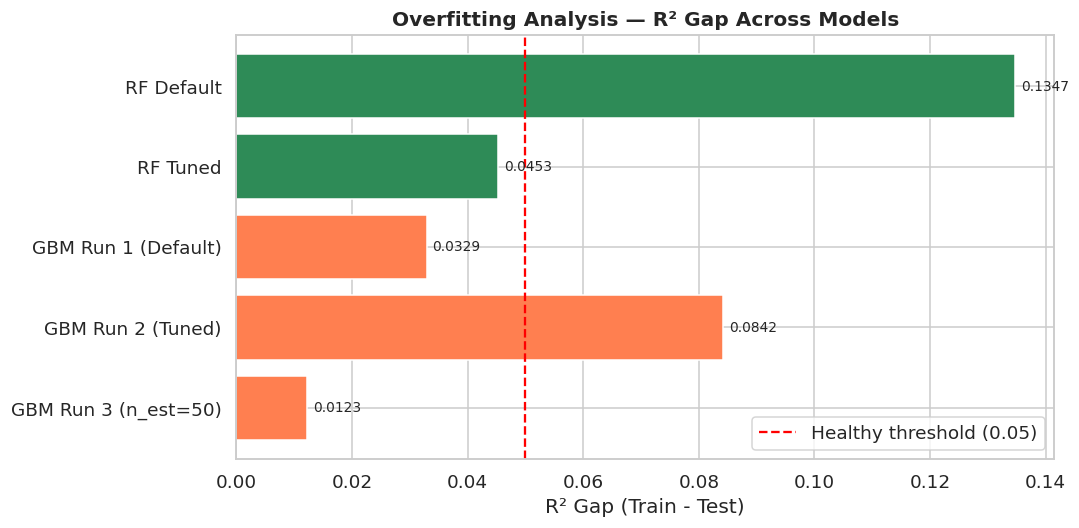

In [13]:
gap_df = final_comparison.dropna(subset=['R² Gap'])

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['seagreen' if 'RF' in m else 'coral' for m in gap_df.index]

bars = ax.barh(gap_df.index[::-1],
               gap_df['R² Gap'][::-1],
               color=colors[::-1], edgecolor='white')

ax.axvline(x=0.05, color='red', linestyle='--',
           linewidth=1.5, label='Healthy threshold (0.05)')

for bar, val in zip(bars, gap_df['R² Gap'][::-1]):
    ax.text(val + 0.001, bar.get_y() + bar.get_height()/2,
            f'{val:.4f}', va='center', fontsize=9)

ax.set_xlabel('R² Gap (Train - Test)')
ax.set_title('Overfitting Analysis — R² Gap Across Models',
             fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

**MAE AND RMSE COMPARISON**

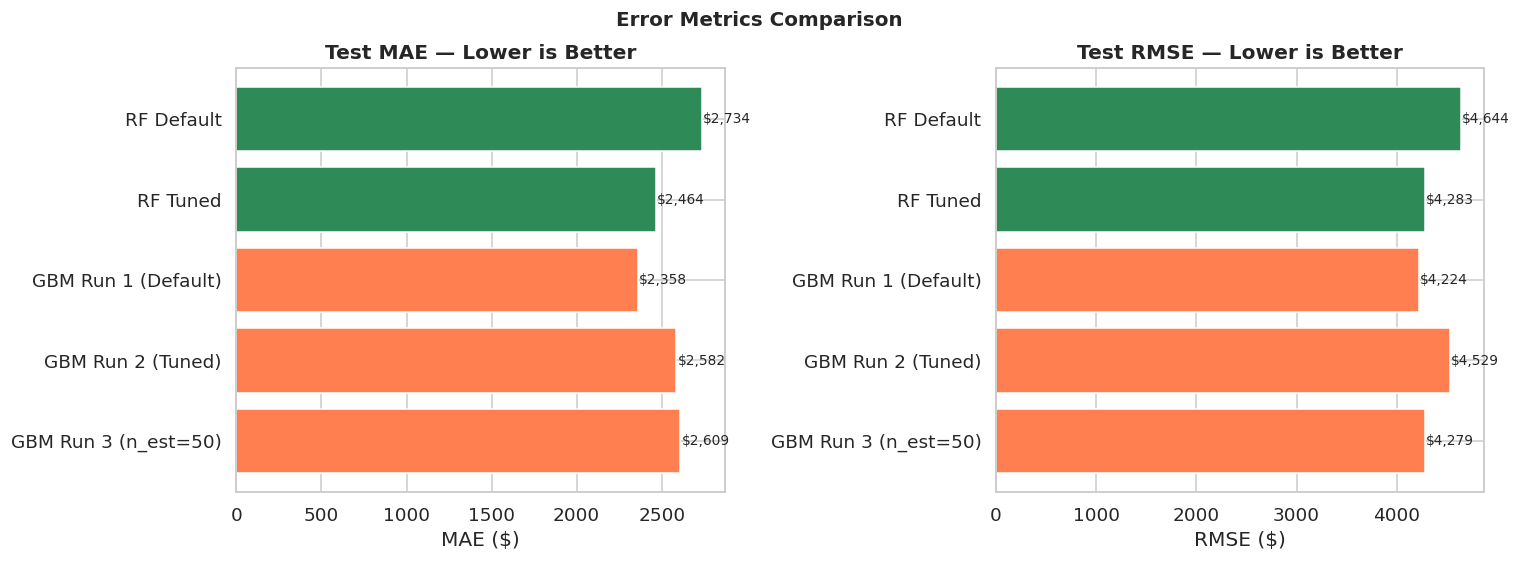

In [14]:
eval_df = final_comparison.dropna(subset=['Test MAE'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors = ['seagreen' if 'RF' in m else 'coral' for m in eval_df.index]

# MAE
axes[0].barh(eval_df.index[::-1],
             eval_df['Test MAE'][::-1],
             color=colors[::-1], edgecolor='white')
axes[0].set_xlabel('MAE ($)')
axes[0].set_title('Test MAE — Lower is Better', fontweight='bold')
for i, val in enumerate(eval_df['Test MAE'][::-1]):
    axes[0].text(val + 10, i, f'${val:,.0f}', va='center', fontsize=9)

# RMSE
axes[1].barh(eval_df.index[::-1],
             eval_df['Test RMSE'][::-1],
             color=colors[::-1], edgecolor='white')
axes[1].set_xlabel('RMSE ($)')
axes[1].set_title('Test RMSE — Lower is Better', fontweight='bold')
for i, val in enumerate(eval_df['Test RMSE'][::-1]):
    axes[1].text(val + 10, i, f'${val:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.suptitle('Error Metrics Comparison', y=1.02,
             fontsize=13, fontweight='bold')
plt.show()

**IMPORTANT FEATURE**

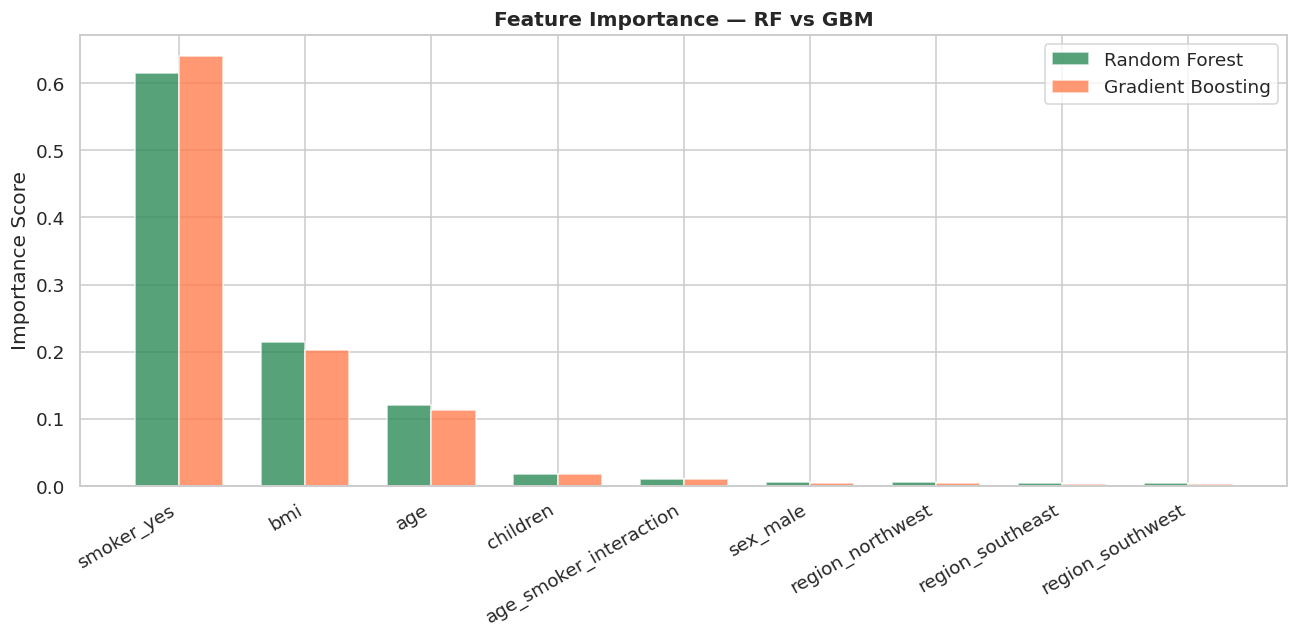

In [15]:
feat_imp = pd.DataFrame({
    'Feature': [
        'smoker_yes', 'bmi', 'age', 'children',
        'age_smoker_interaction', 'sex_male',
        'region_northwest', 'region_southeast','region_southwest'
    ],
    'Random Forest': [
        0.6154, 0.2139, 0.1214, 0.0173,
        0.0112, 0.0059, 0.0054, 0.0051, 0.0043
    ],
    'Gradient Boosting': [
        0.6400, 0.2030, 0.1140, 0.0180,
        0.0100, 0.0050, 0.0040, 0.0030, 0.0030
    ]
})

feat_imp = feat_imp.set_index('Feature')
x = np.arange(len(feat_imp))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, feat_imp['Random Forest'],
       width, label='Random Forest', color='seagreen', alpha=0.8)
ax.bar(x + width/2, feat_imp['Gradient Boosting'],
       width, label='Gradient Boosting', color='coral', alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(feat_imp.index, rotation=30, ha='right')
ax.set_ylabel('Importance Score')
ax.set_title('Feature Importance — RF vs GBM', fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()



## Business Insights

1. Smoking is the single largest driver of insurance charges
    accounting for 61-64% of predictive power across both models.
   A smoker costs 3-6x more than a non-smoker regardless of age.

2. BMI and age together with smoking explain 95% of charge variance.
   An insurer needs only these three data points to price accurately.

3. Sex and region have near-zero influence on charges.
   These should not be primary factors in premium pricing.

4. The Random Forest Classifier achieved 99.4% AUC in detecting
   smokers from charges and demographics ; enabling fraud detection
   for customers who misreport smoking status.

5. Tree-based models outperformed OLS by ~11% in R²
   confirming that insurance charges follow non-linear patterns
   driven by distinct risk subpopulations.



## Project Conclusion

* Started with OLS baseline R² = 0.751
   * Systematically tested outlier removal, feature selection,
   * multicollinearity fixes — none improved OLS beyond 0.751.

* Moving to tree-based models:
  * Random Forest  → R² = 0.8647  (+11.4% over OLS)
  * Gradient Boost → R² = 0.8684  (+11.7% over OLS)

* The residual plot transformation from 3 distinct clusters (OLS)
   to random scatter (GBM/RF) visually confirmed that tree-based
   models solved the fundamental subpopulation problem that linear
   regression could not handle.

* Final recommended model;
     * GBM Run 1 for accuracy
     * GBM Run 3 for production stability